Before getting into financial modelling, lets learn a little about probabilty distribution 
- Probability distribution describes how likely each possible value of a random variable is. 
  - For example:
  1. When you roll a die, each number (1–6) has equal probability → Uniform distribution.
  2. When you measure people’s heights, most are near average → Normal distribution.
- There are two types of distribution discrete and continous 
- There are 6 essential distributions in finance :
    - Normal Distribution : data is cluestered around an average 
    - Log-Normal Distribution : if returns are normal then prices are log-normal. captures expotential growth 
    - Student's t-distribution: more prone to outliers. used when there are fat tails
    - Expotential Distribution: models time between independent random events 
    - Pareto (Power-Law) Distribution: heavy-tailed used for extreme values. describes wealth distribution, large losses and extreme events
    - beta distribution: defined bewteen 0 and 1 - flexible shapes. used to model probabilities, risk factors or portfolio weights 
    

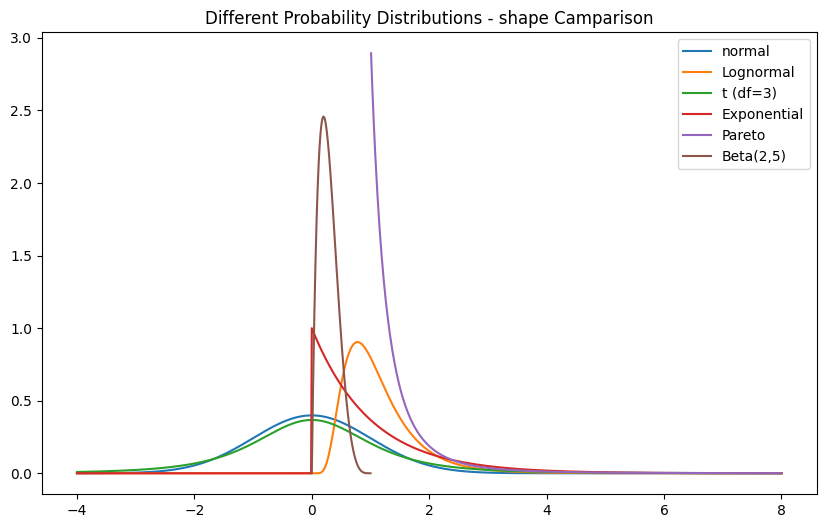

In [2]:
# lets visualize what we learned 

import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm, t, expon, pareto,beta

x = np.linspace(-4,8,1000)
plt.figure(figsize=(10,6))

plt.plot(x, norm.pdf(x,0,1), label='normal')
plt.plot(x, lognorm.pdf(x,0.5,scale=np.exp(0)), label='Lognormal')
plt.plot(x, t.pdf(x, df=3), label='t (df=3)')
plt.plot(x, expon.pdf(x, scale=1), label='Exponential')
plt.plot(x[x>1], pareto.pdf(x[x>1], 3), label='Pareto')
plt.plot(np.linspace(0,1,1000), beta.pdf(np.linspace(0,1,1000), 2, 5), label='Beta(2,5)')
plt.legend()
plt.title("Different Probability Distributions - shape Camparison")
plt.show()

- Normal → smooth, symmetric.

- t(3) → same center, heavier tails.

- Lognormal → skewed right.

- Exponential/Pareto → only positive, decaying slowly.

- Beta → confined between 0 and 1.

### Why it matters in finanace:

| Use Case                             | Typical Distribution                |
| ------------------------------------ | ----------------------------------- |
| Stock **returns**                    | Student’s t or Laplace (fat-tailed) |
| Stock **prices**                     | Lognormal                           |
| **Risk events / defaults**           | Exponential                         |
| **Wealth, loss magnitudes**          | Pareto                              |
| **Portfolio weights, probabilities** | Beta                                |


/var/folders/kr/gft6qzsx1pd7p6nqyq9g3wd00000gn/T/ipykernel_97948/4136844491.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2020-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


Number of daily returns: 1257


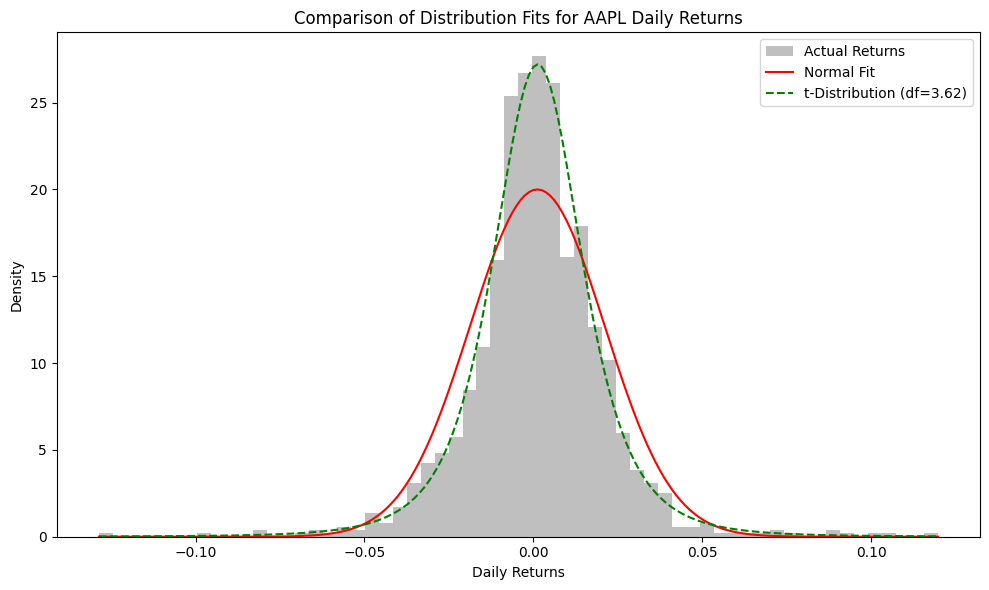

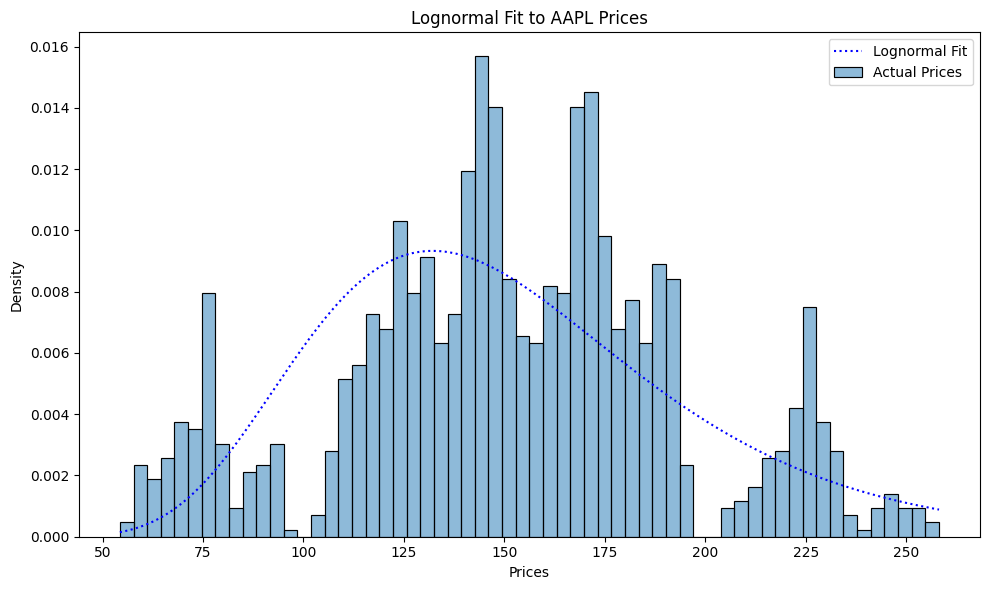

In [21]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

# Step 1: Get Apple stock data
data = yf.download("AAPL", start="2020-01-01", end="2025-01-01")
prices = data['Close']
returns = data['Close'].pct_change().dropna()

n = len(returns)
print(f"Number of daily returns: {n}")

# Step 2: Plot histogram of returns
plt.figure(figsize=(10,6))
plt.hist(returns, bins=60, density=True, alpha=0.5, color='gray', label='Actual Returns')

# Step 3: Fit Normal distribution
mu, sigma = stats.norm.fit(returns)
x = np.linspace(returns.min(), returns.max(), 200)
plt.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', label='Normal Fit')

# Step 4: Fit Student’s t-distribution
df, loc, scale = stats.t.fit(returns)
plt.plot(x, stats.t.pdf(x, df, loc, scale), 'g--', label=f"t-Distribution (df={df:.2f})")

# Step 6: Add labels
plt.title("Comparison of Distribution Fits for AAPL Daily Returns")
plt.xlabel("Daily Returns")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

# -------- FIT LOGNORMAL DISTRIBUTION TO PRICES --------
shape, loc, scale = stats.lognorm.fit(prices, floc=0)  # Shift to positive
x_price = np.linspace(prices.min(), prices.max(), 200)
plt.figure(figsize=(10,6))
sns.histplot(prices, bins=60, stat="density", color='gray', label='Actual Prices')
plt.plot(x_price, stats.lognorm.pdf(x_price, shape, loc, scale), 'b:', label='Lognormal Fit')
plt.title("Lognormal Fit to AAPL Prices")
plt.xlabel("Prices")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()


## Somthing that is common in finance is what is the best model ?

when working with statistical models - say normal, t-distribution or log normal : you will find that adding more parameters it fits the data better but this could lead to overfitting problem ! 

SO we need a metric that balances : how well the model fits the data (measured by likeihood) and how simple is the model (penalize too many parameters)

1. Akaike Information Criterion (AIC):
- formula: 2k - 2ln(L)  [k=number of parameters, L=maximum likelihood of the model]
- Intution : -2ln(L) - measures how bad the model fits (smaller the better) and 2k - penalies complexity (more para means higher penalty)
- Smaller AIC = better model 

2. Bayesian Information Criterion (BIC):
- formula: kln(n) - 2ln(L) [n=number of observations, k = number of params, L=maximum likelihood of the model]
- BIC penalizes complex models more heavyily than AIC (because ln(n)>2 ususally)
- Smaller BIC = better model 


**Let's look at the practical use of it in finance**

 - use AIC/BIC to choose between different distributions for modelling returns 
 - pick the best ARIMA and GARCH parameters for time-series
 - Evaluate ML models variants (when not cross-validating)

Basically, 
 `AIC` = "How efficient is the model?"
 `BIC` = "Is this model justified given the data size?"

<span style="color:lightblue;">**Note**</span>

- mu : expected daily edge (average return) and sigma: risk per trade (volatility) and log-likehood : how believable your model is and AIC/BIC : decide whether adding another paramter to your model is worth it or not ?

- mu and sigma : to find the best fitting mean and std that make the bell curve fit to your actual stock returns data as closely as possible 

- log likelihood and why sum it : each data point has a probability density under normal distribution for a point shows how likely return x<sub>i</sub> if returns truly follow the normal curve. log-likelihood - a measure of how well the fitted distribution explains the actual data. higher log-likihood -> model fits better

Fitted Normal Distribution: mu = 0.00, sigma = 0.02
Normal Distribution: Log-Likelihood = 3137.10, AIC = -6270.19, BIC = -6259.92
Fitted t-Distribution: df = 3.62, mu = 0.00, sigma = 0.01
t-Distribution: Log-Likelihood = 3242.68, AIC = -6479.35, BIC = -6463.94


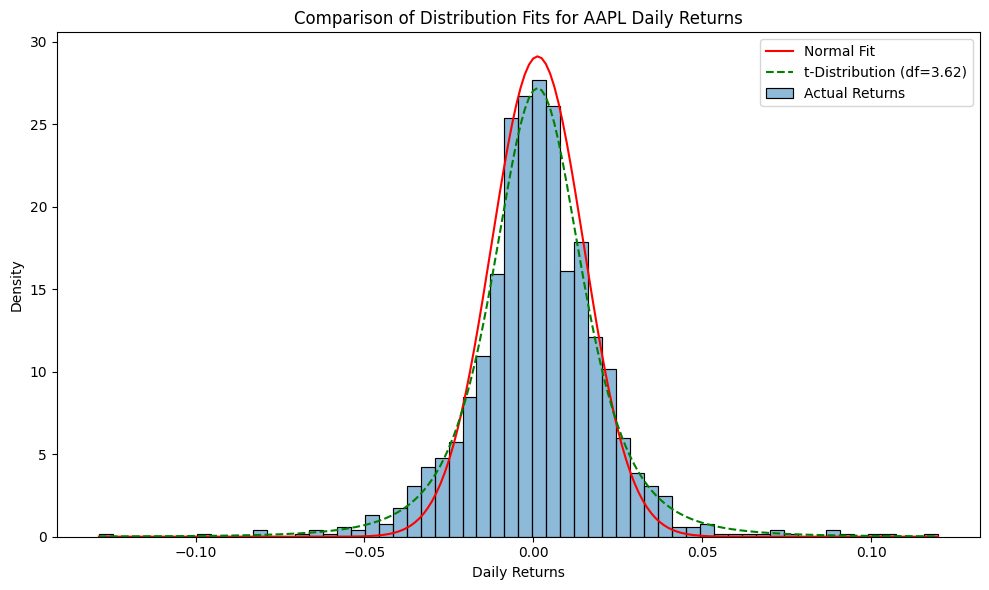

In [25]:
# mu = mean
# sigma = standard deviation
# df = degrees of freedom
# loc = location

mu, sigma = stats.norm.fit(returns) # basically asking what is the best fit for mean and std that make the bell curve fit the data, solving for mu and sigma that maximizes the likelihood of observing the data
print(f"Fitted Normal Distribution: mu = {mu:.2f}, sigma = {sigma:.2f}")
loglike_norm = np.sum(stats.norm.logpdf(returns, mu, sigma)) # each data point has a probability of being observed given mu and sigma, logpdf gives the log of that probability, sum gives the total log likelihood, 
aic_norm = 2*2 - 2*loglike_norm # 2 parameters (mu and sigma)
bic_norm = np.log(n)*2 - 2*loglike_norm # n is number of data points
print(f"Normal Distribution: Log-Likelihood = {loglike_norm:.2f}, AIC = {aic_norm:.2f}, BIC = {bic_norm:.2f}")

df, mu, sigma = stats.t.fit(returns) # solving for degree of freedom, mean, std that maximizes the likelihood of observing the data
loglike_t = np.sum(stats.t.logpdf(returns, df, mu, sigma)) # each data point has a probability of being observed given df, mu and sigma, logpdf gives the log of that probability, sum gives the total log likelihood,
aic_t = 2*3 - 2*loglike_t # 3 parameters (df, mu and sigma)
bic_t = np.log(n)*3 - 2*loglike_t # n is number of data points
print(f"Fitted t-Distribution: df = {df:.2f}, mu = {mu:.2f}, sigma = {sigma:.2f}")
print(f"t-Distribution: Log-Likelihood = {loglike_t:.2f}, AIC = {aic_t:.2f}, BIC = {bic_t:.2f}")

# everything needs to visualize the fit, and calculate log likelihood, AIC, BIC to compare which distribution fits best
x = np.linspace(returns.min(), returns.max(), 200)
plt.figure(figsize=(10,6))
sns.histplot(returns, bins=60, stat="density", color='gray', label='Actual Returns')
plt.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', label='Normal Fit')
plt.plot(x, stats.t.pdf(x, df, mu, sigma), 'g--', label=f"t-Distribution (df={df:.2f})")
plt.title("Comparison of Distribution Fits for AAPL Daily Returns")
plt.xlabel("Daily Returns")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()


## What I observe is :

- The student t-distribution fits better at tails (captures large moves)
- Its AIC/BIC is lower, showing better fit inspite of having an extra parameter 
- This matches are theory, returns are fat-tailed, not perfectly gaussian 